0.29999999999999893 4.300000000000003


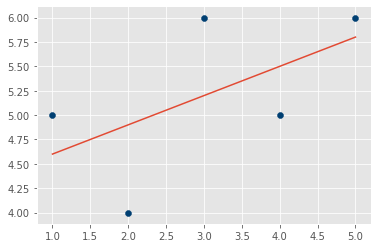

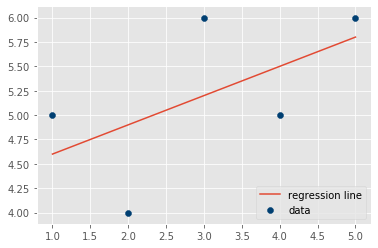

In [0]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

xs = [1,2,3,4,5]
ys = [5,4,6,5,6]

xs = np.array([1,2,3,4,5], dtype=np.float64)
ys = np.array([5,4,6,5,6], dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
  m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)**2) - mean(xs*xs)))
  
  b = mean(ys) - m*mean(xs)
  return m, b
m, b = best_fit_slope_and_intercept(xs,ys)
print(m, b)

regression_line = [(m*x)+b for x in xs]
regression_line = []
for x in xs:
    regression_line.append((m*x)+b)

plt.scatter(xs,ys,color='#003F72')
plt.plot(xs, regression_line)
plt.show()

predict_x = 7
predict_y = (m*predict_x) + b

plt.scatter(xs,ys,color='#003F72',label='data')
plt.plot(xs, regression_line, label='regression line')
plt.legend(loc=4)
plt.show()

dejamos el codigo anterior intacto
copiamos parte del codigo anterior y calculamos el error cuadratico 

In [0]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

xs = [1,2,3,4,5]
ys = [5,4,6,5,6]

xs = np.array([1,2,3,4,5], dtype=np.float64)
ys = np.array([5,4,6,5,6], dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
  m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)**2) - mean(xs*xs)))
  
  b = mean(ys) - m*mean(xs)
  return m, b

def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]

r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)

##plt.scatter(xs,ys,color='#003F72',label='data')
##plt.plot(xs, regression_line, label='regression line')
##plt.legend(loc=4)
##plt.show()

0.3214285714285714


Es un valor bastante bajo, por lo que en realidad nuestra línea de mejor ajuste no es tan buena de acuerdo con esta medida. ¿Es r al cuadrado una buena medida en este caso? Puede depender de cuáles son sus objetivos. En la mayoría de los casos, si le importa predecir valores futuros exactos, r al cuadrado es realmente muy útil. Si está interesado en predecir el movimiento / dirección, entonces nuestra mejor línea de ajuste es bastante buena hasta ahora, y r al cuadrado no debería tener tanto peso. Sin embargo, mira nuestro conjunto de datos real. Nos quedamos con números bajos y enteros. La variación de un valor a otro fue del 20-50% en algunos puntos, esa es una variación muy alta. 